In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import utils as u
import fake_profile as fp
from astropy.modeling import models, fitting
import scipy.optimize as so

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
def gaussian(x, a1, a2, a3, m1, m2, m3, sd1, sd2, sd3):
    model = models.Gaussian1D(a1, m1, sd1) + models.Gaussian1D(a2, m2, sd2) + \
            models.Gaussian1D(a3, m3, sd3)
    return model(x)

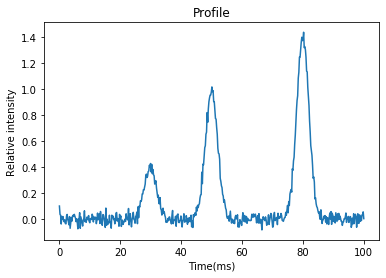

In [5]:
a1 = [2, 5, 7]
mu1 = [30, 50,80]
sd1 = [2, 2, 2]

prof = fp.fake_profile(a1,mu1,sd1)
prof.construct_profile(noise=True)
prof.plot()

In [6]:
x = prof.domain
a_guess = [.6, 1, 1.4]
mu_guess = [32, 52, 81]
sd_guess = [1, 2, 2]

#params = []
#cov = []

#for i in range(len(a_guess)):
params, cov = so.curve_fit(gaussian, x, prof.profile, p0=[a_guess, mu_guess, sd_guess])
    #params += p.tolist()
    #cov += c.tolist()

In [9]:
cov.shape

(9, 9)

In [10]:
cov

array([[ 7.36504053e-05, -4.13888636e-13,  2.05559885e-33,
         5.48251828e-11, -3.73517341e-13,  2.64103236e-34,
        -2.49039070e-04,  1.78669677e-12, -5.93995709e-33],
       [-4.13888636e-13,  7.33943091e-05, -1.18655633e-25,
         9.23250295e-13,  3.71114962e-11, -1.54149324e-26,
         4.39220331e-12, -1.00963217e-04,  3.42890385e-25],
       [ 2.05559885e-33, -1.18655633e-25,  7.34550375e-05,
        -4.58012995e-33,  4.92966859e-26,  4.16893130e-11,
        -2.18121296e-32,  4.89677812e-25, -7.07566523e-05],
       [ 5.48251828e-11,  9.23250295e-13, -4.58012995e-33,
         2.52627773e-03,  8.13150294e-13, -5.88605460e-34,
        -2.79643271e-10, -3.97906055e-12,  1.32349787e-32],
       [-3.73517341e-13,  3.71114962e-11,  4.92966859e-26,
         8.13150294e-13,  4.16663288e-04,  9.69079501e-27,
         3.95565581e-12, -7.67016306e-11, -1.42793022e-25],
       [ 2.64103236e-34, -1.54149324e-26,  4.16893130e-11,
        -5.88605460e-34,  9.69079501e-27,  2.044721